**1. Install Required Librraies**

In [ ]:
!pip install seaborn scikit-learn

**2. Import Required Libraries**

In [ ]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import zipfile
import io

**3. Load the Dataset**

In [ ]:
# Convert the zipfile into csv file
zip_path = "/content/Mall Customers.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content")  # it will extract file to /content
    print("Extracted files:")
    print(zip_ref.namelist())       # List the extracted file

Extracted files:
['Mall_Customers.csv']


In [ ]:
csv_path = "/content/Mall_Customers.csv"
df = pd.read_csv(csv_path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**4. EDA (Exploratory Data Analysis)**

In [ ]:
# Display all the columns
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
# Check basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [ ]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [ ]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


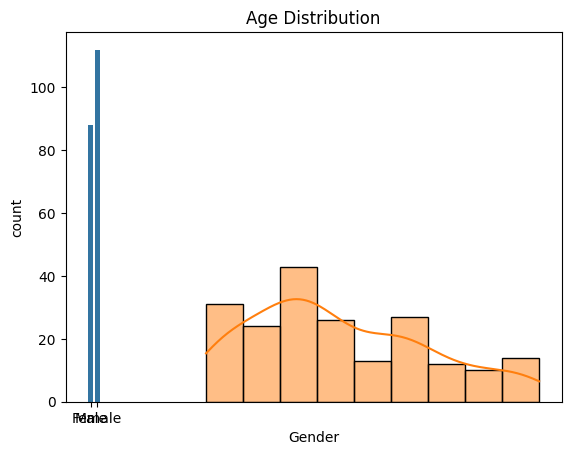

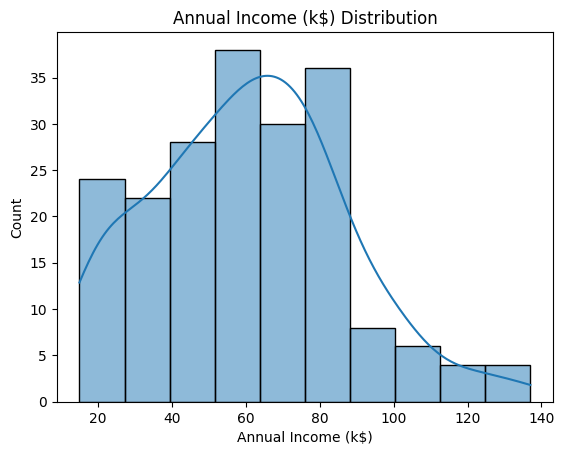

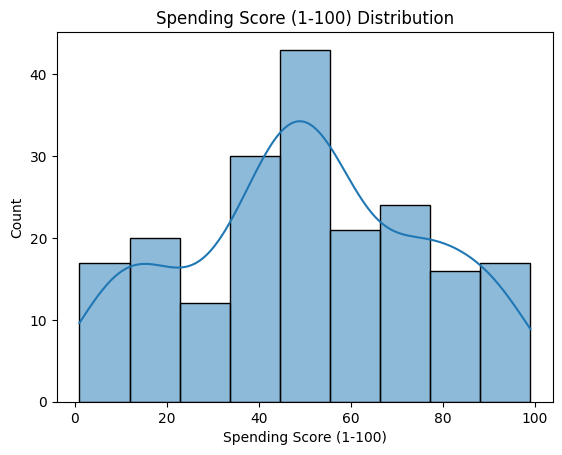

In [ ]:
# Gender distribution
sns.countplot(x='Gender', data=df)

# Age, Income, Spending Score Distributions
for column in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    sns.histplot(df[column], kde=True)
    plt.title(f'{column} Distribution')
    plt.show()

**5. Data Preprocessing**

In [ ]:
# Convert Gender to numerical
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

In [ ]:
# Select features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**6. Elbow Method to Choose Clusters**

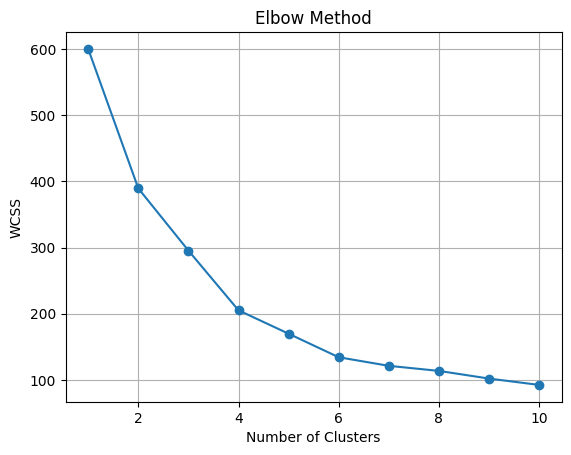

In [ ]:
# Within Cluster Sum of Squares (wcss)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

**7. Apply K-Means Clustering**

In [ ]:
# For the best number of customer segments; n_clusters=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,3
3,4,0,23,16,77,2
4,5,0,31,17,40,2


In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,3
3,4,0,23,16,77,2
4,5,0,31,17,40,2
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,4
197,198,1,32,126,74,1
198,199,1,32,137,18,4


**8. Visualize Clusters**

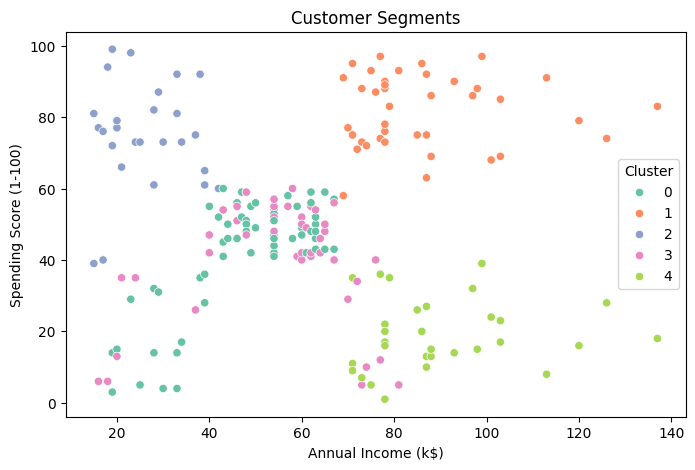

In [ ]:
# 2D Plot (Income vs Spending Score)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', data=df)
plt.title('Customer Segments')
plt.show()

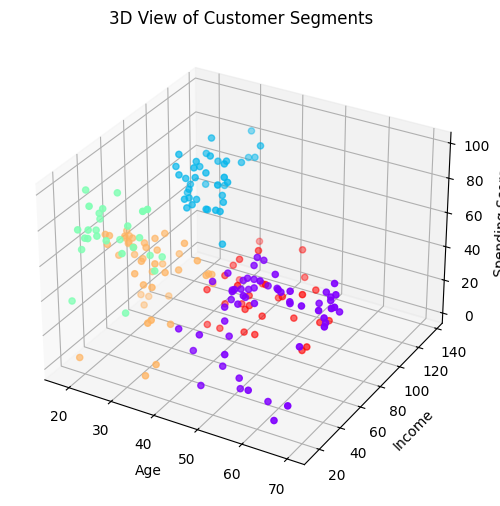

In [ ]:
# 3D Plot (Age, Income, Spending)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='rainbow')
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Spending Score')
plt.title('3D View of Customer Segments')
plt.show()

**9. Interpret Segments**

In [ ]:
summary = df.groupby('Cluster').mean(numeric_only=True)
print(summary)

         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         68.775862  0.431034  55.275862           47.620690   
1        161.025000  0.450000  32.875000           86.100000   
2         23.461538  0.423077  25.769231           26.115385   
3         86.377778  0.400000  26.733333           54.311111   
4        166.870968  0.516129  44.387097           89.774194   

         Spending Score (1-100)  
Cluster                          
0                     41.706897  
1                     81.525000  
2                     74.846154  
3                     40.911111  
4                     18.483871  


In [ ]:
# Add Cluster Data and Save as CSV
# Assign the cluster labels from KMeans to the 'Cluster' column in your dataframe
df['Cluster'] = kmeans.labels_

# Now, save this DataFrame with cluster labels to a CSV file
df.to_csv('/content/customer_segmentation_with_clusters.csv', index=False)

# Check if the file is saved correctly
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,3
3,4,0,23,16,77,2
4,5,0,31,17,40,2


**10. Streamlit Code (`for app.py`)**

In [ ]:
# Install Streamlit
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
@st.cache
def load_data():
    # Assuming you have your cluster data in a CSV or DataFrame
    data = pd.read_csv('/content/customer_segmentation_with_clusters.csv')
    return data

# Main app code
def main():
    st.title("Customer Segmentation Interpretation")

    # Load dataset
    df = load_data()

    # Show the dataframe to the user
    st.subheader("Cluster Data")
    st.write(df)

    # Show insights for each cluster
    st.subheader("Cluster Interpretation")

    # Write interpretation based on the average values you have
    cluster_interpretations = {
        0: "Older customers with medium income & moderate spending. Might be retired or in a stable phase of life.",
        1: "High-income, mid-aged customers who spend a lot. Likely professionals with premium shopping preferences.",
        2: "Young, low-income, but impulsive spenders. Likely students or entry-level workers.",
        3: "Young adults with balanced income and moderate spending habits. Likely in the early stages of their careers.",
        4: "Older, high-income customers who spend very little. Likely careful buyers or minimalists."
    }

    # Display interpretation for each cluster
    for cluster, interpretation in cluster_interpretations.items():
        st.write(f"**Cluster {cluster}:** {interpretation}")

    # Scatter plot to visualize clusters
    st.subheader("Cluster Visualization")
    fig, ax = plt.subplots()  # Create a figure and axis
    sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=df, palette='Set2', ax=ax)
    ax.set_title("Customer Segments by Age vs. Income")
    st.pyplot(fig)  # Pass the figure object

    # Another plot for Spending Score
    st.subheader("Spending Score Visualization")
    fig, ax = plt.subplots()  # Create a new figure and axis
    sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set2', ax=ax)
    ax.set_title("Customer Segments by Age vs. Spending Score")
    st.pyplot(fig)  # Pass the figure object

if __name__ == "__main__":
    main()

2025-04-12 20:03:13.825 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-12 20:03:13.826 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-12 20:03:13.827 
`st.cache` is deprecated and will be removed soon. Please use one of Streamlit's new
caching commands, `st.cache_data` or `st.cache_resource`. More information
[in our docs](https://docs.streamlit.io/develop/concepts/architecture/caching).

**Note**: The behavior of `st.cache` was updated in Streamlit 1.36 to the new caching
logic used by `st.cache_data` and `st.cache_resource`. This might lead to some problems
or unexpected behavior in certain edge cases.

2025-04-12 20:03:13.829 No runtime found, using MemoryCacheStorageManager
2025-04-12 20:03:13.832 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-12 20:03:13.833 Thread 'MainThread': missing ScriptRu

In [28]:
!wget -qO- ipv4.icanhazip.com

35.236.135.9


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.2:8501
  External URL: http://35.236.135.9:8501

⠸⠼⠴⠦⠧⠇Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼your url is: https://six-wings-repeat.loca.lt
2025-04-12 20:08:36.337 
`st.cache` is deprecated and will be removed soon. Please use one of Streamlit's new
caching commands, `st.cache_data` or `st.cache_resource`. More information
[in our docs](https://docs.streamlit.io/develop/concepts/architecture/caching).

**Note**: The behavior of `st.cache` was updated in Streamlit 1.36 to the new caching
logic used by `st.cache_data` and `st.cache_resource`. This might lead to some problems
or unexpected behavior in certain edge cases.

